In [102]:
from utils import *
from MySolution import MyClassifier_OvA, MyClustering, MyLabelSelection, MyFeatureSelection, MyClassification_SVMLinear, MyClassifier_OvO, ExternalClustering, MIFeatureSelection

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Synthetic data shape:  (1000, 2) (1000,)


Text(0, 0.5, 'x2')

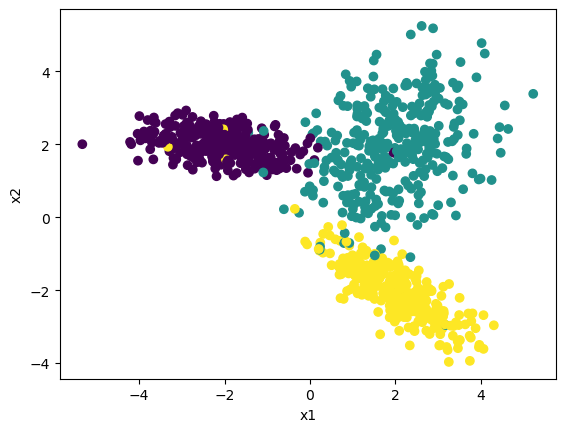

In [80]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])
plt.xlabel("x1")
plt.ylabel("x2")

# Classification

## Synthetic Data Training & Testing 

In [81]:
batch_size, feature_dim = syn_data['trainX'].shape
print(f"batch size = {batch_size}, feature_dim = {feature_dim}")
clf1_OvO = MyClassifier_OvO(num_class=3)
SVM_kernel = MyClassification_SVMLinear(num_classes=3)
# Training
OvO_clfs = clf1_OvO.train(syn_data['trainX'], syn_data['trainY'])   # One vs One
SVM_clfs = SVM_kernel.train(syn_data['trainX'], syn_data['trainY']) # External reference

batch size = 1000, feature_dim = 2


In [82]:
# Testing
from sklearn.metrics import normalized_mutual_info_score, accuracy_score
pred_Y_OvO = clf1_OvO.predict(syn_data['testX'])
pred_Y_SVM = SVM_kernel.predict(syn_data['testX'])

acc_score_OvO = accuracy_score(y_true=syn_data['testY'], y_pred=pred_Y_OvO)
acc_score_SVM = accuracy_score(y_true=syn_data['testY'], y_pred=pred_Y_SVM)

print(f"accuracy score OvO = {acc_score_OvO}")
print(f"accuracy score external reference SVM = {acc_score_SVM}")

accuracy score OvO = 0.978
accuracy score external reference SVM = 0.978


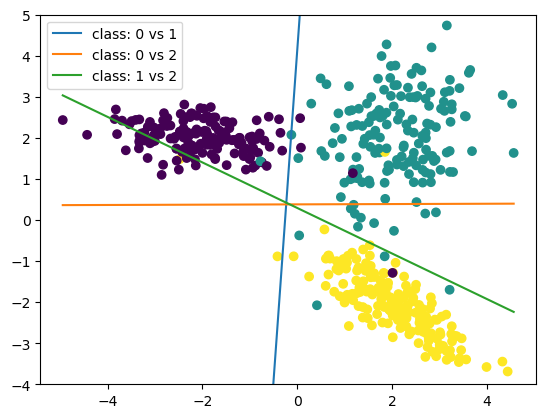

In [83]:
# Visualize the testing points
plt.scatter(syn_data['testX'][:, 0], syn_data['testX'][:, 1], c=syn_data['testY'])

# Visualize the decision boundaries (db)
keys = OvO_clfs.keys()
for key in keys:
    W, b = OvO_clfs[key]
    x1 = np.linspace(min(syn_data['testX'][:, 0]), max(syn_data['testX'][:, 0]), 100)
    x2 = -(W[0]*x1 + b)/W[1]
    plt.plot(x1, x2, label=f"class: {int(key[0])} vs {int(key[1])}")
plt.ylim([-4, 5])
plt.legend()

## Fasion - MNIST Data Training & Testing

MNIST data shape:  (1000, 784) (1000,)


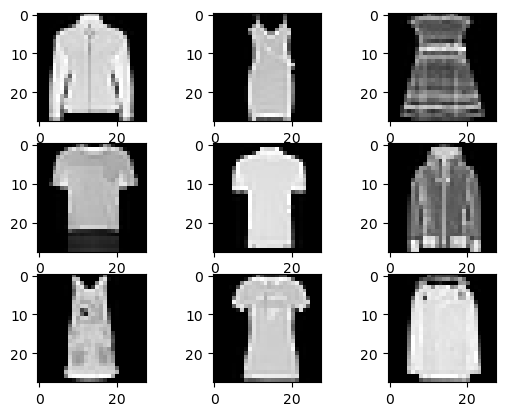

In [84]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

In [85]:
batch_size, feature_dim = mnist_data['trainX'].shape
print(f"batch size = {batch_size}, feature_dim = {feature_dim}")
clf2_OvO = MyClassifier_OvO(num_class=3)
SVM_clfs = MyClassification_SVMLinear(num_classes=3)
# Training
OvO_clfs = clf2_OvO.train(mnist_data['trainX'], mnist_data['trainY'])
SVM_clfs.train(mnist_data['trainX'], mnist_data['trainY'])


batch size = 1000, feature_dim = 784


/Users/brucequ/miniforge3/envs/deeplearning2/lib/python3.8/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{(0.0, 3.0): SVC(kernel='linear'),
 (0.0, 4.0): SVC(kernel='linear'),
 (3.0, 4.0): SVC(kernel='linear')}

In [86]:
# Testing
pred_Y = clf2_OvO.predict(mnist_data['testX'])
pred_Y_SVM = SVM_clfs.predict(mnist_data['testX'])
acc_score = accuracy_score(y_true=mnist_data['testY'], y_pred=pred_Y)
acc_score_SVM = accuracy_score(y_true=mnist_data['testY'], y_pred=pred_Y_SVM)

print(f"accuracy score OvO= {acc_score}")
print(f"accuracy score SVM = {acc_score_SVM}")

accuracy score OvO= 0.884
accuracy score SVM = 0.904


# Clustering

## Synthetic Data

In [88]:
num_clusters = [3, 5, 10]

for num_cluster in num_clusters:
    print(f"--- num_cluster = {num_cluster} ---")
    
    # external reference
    external_clustering = ExternalClustering(num_clusters=num_cluster)
    external_clustering.train(syn_data['trainX'], syn_data['trainY'])
    pred_Y = external_clustering.predict(syn_data['testX'])
    ext_acc_score = external_clustering.evaluate_classification(syn_data['trainY'].astype(int), testX=syn_data['testX'] ,testY=syn_data['testY'].astype(int))
    ext_nmi_score = external_clustering.evaluate_clustering(syn_data['trainY'].astype(int))
    
    print(f"accuracy score external reference = {ext_acc_score:.4f}")
    print(f"NMI score external reference = {ext_nmi_score:.4f}")
    
    # dut
    dut_clustering = MyClustering(num_classes=num_cluster)
    dut_clustering.train(syn_data['trainX'])
    pred_labels = dut_clustering.infer_cluster(syn_data['testX'])
    dut_acc_score = dut_clustering.evaluate_classification(trainY=syn_data['trainY'].astype(int), testX=syn_data['testX'] ,testY=syn_data['testY'].astype(int))
    dut_nmi_score = dut_clustering.evaluate_clustering(syn_data['trainY'].astype(int))
    
    print(f"accuracy score DUT = {dut_acc_score:.4f}")
    print(f"NMI score DUT = {dut_nmi_score:.4f} \n")
    

--- num_cluster = 3 ---
accuracy score external reference = 0.9680
NMI score external reference = 0.8278
Converged after 9 iterations.
accuracy score DUT = 0.9620
NMI score DUT = 0.8200 

--- num_cluster = 5 ---
accuracy score external reference = 0.9240
NMI score external reference = 0.7727
Converged after 5 iterations.
accuracy score DUT = 0.9700
NMI score DUT = 0.8401 

--- num_cluster = 10 ---
accuracy score external reference = 0.9740
NMI score external reference = 0.8740
Converged after 9 iterations.
accuracy score DUT = 0.9700
NMI score DUT = 0.8235 



## Fasion - MNIST Data

In [89]:
num_clusters = [3, 10, 32]

for num_cluster in num_clusters:
    print(f"--- num_cluster = {num_cluster} ---")
    
    # external reference
    external_clustering = ExternalClustering(num_clusters=num_cluster)
    external_clustering.train(mnist_data['trainX'], mnist_data['trainY'])
    pred_Y = external_clustering.predict(mnist_data['testX'])
    ext_acc_score = external_clustering.evaluate_classification(mnist_data['trainY'].astype(int), testX=mnist_data['testX'] ,testY=mnist_data['testY'].astype(int))
    ext_nmi_score = external_clustering.evaluate_clustering(mnist_data['trainY'].astype(int))
    
    print(f"accuracy score external reference = {ext_acc_score:.4f}")
    print(f"NMI score external reference = {ext_nmi_score:.4f}")
    
    # dut
    dut_clustering = MyClustering(num_classes=num_cluster)
    dut_clustering.train(mnist_data['trainX'])
    pred_labels = dut_clustering.infer_cluster(mnist_data['testX'])
    dut_acc_score = dut_clustering.evaluate_classification(trainY=mnist_data['trainY'].astype(int), testX=mnist_data['testX'] ,testY=mnist_data['testY'].astype(int))
    dut_nmi_score = dut_clustering.evaluate_clustering(mnist_data['trainY'].astype(int))
    
    print(f"accuracy score DUT = {dut_acc_score:.4f}")
    print(f"NMI score DUT = {dut_nmi_score:.4f} \n")

--- num_cluster = 3 ---
accuracy score external reference = 0.6420
NMI score external reference = 0.3035
Converged after 4 iterations.
accuracy score DUT = 0.7740
NMI score DUT = 0.4842 

--- num_cluster = 10 ---
accuracy score external reference = 0.8080
NMI score external reference = 0.5251
Converged after 3 iterations.
accuracy score DUT = 0.7960
NMI score DUT = 0.3935 

--- num_cluster = 32 ---
accuracy score external reference = 0.8800
NMI score external reference = 0.6458
Converged after 3 iterations.
accuracy score DUT = 0.8280
NMI score DUT = 0.5415 



# Part 3

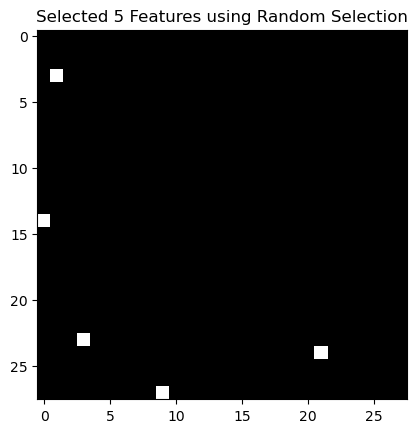

accuracy score random selection = 0.644
Converged after 6 iterations.
accuracy score random selection = 0.6
NMI score random selection = 0.18549724622087962


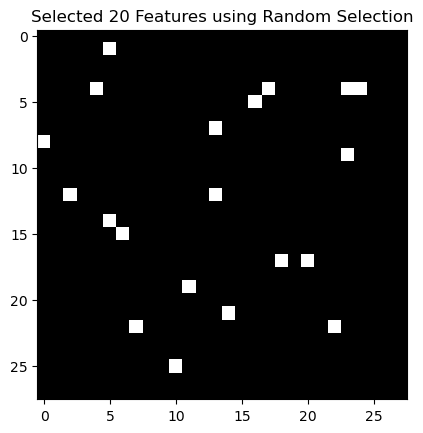

accuracy score random selection = 0.838
Converged after 5 iterations.
accuracy score random selection = 0.762
NMI score random selection = 0.4064817577822011


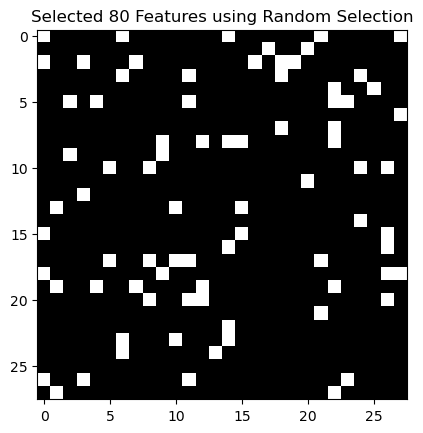

accuracy score random selection = 0.862
Converged after 5 iterations.
accuracy score random selection = 0.796
NMI score random selection = 0.46708480577265094


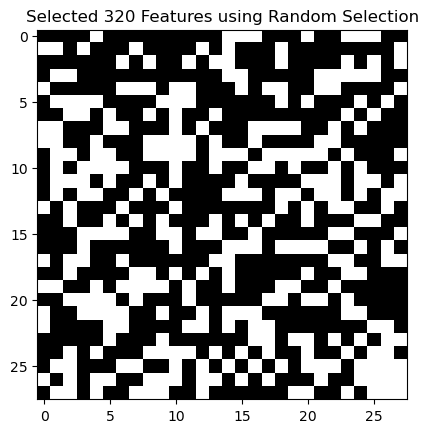

/Users/brucequ/miniforge3/envs/deeplearning2/lib/python3.8/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


accuracy score random selection = 0.89
Converged after 3 iterations.
accuracy score random selection = 0.766
NMI score random selection = 0.4963650452564443


In [100]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_features = [5, 20, 80, 320]
np.random.seed(0)
#### Random feature selection ####
# randomly choose n features
for n_feature in n_features:
  data = prepare_mnist_data()
  selected_features = np.random.choice(data['trainX'].shape[1], n_feature, replace=False)
  data['trainX'] = data['trainX'][:, selected_features]
  data['testX'] = data['testX'][:, selected_features]

  visualize_features(selected_features, "Random Selection")

  clf_random = MyClassifier_OvO(num_class=3)
  clf_random.train(data['trainX'], data['trainY'])
  pred_Y = clf_random.predict(data['testX'])
  acc_score = accuracy_score(y_true=data['testY'], y_pred=pred_Y)
  print(f"accuracy score random selection = {acc_score}")

  clu_random = MyClustering(num_classes=10)
  clu_random.train(data['trainX'])
  pred_labels = clu_random.infer_cluster(data['testX'])
  acc_score_random = clu_random.evaluate_classification(trainY=data['trainY'].astype(int), testX=data['testX'], testY=data['testY'].astype(int))
  nmi_score_random = clu_random.evaluate_clustering(trainY=data['trainY'].astype(int))
  print(f"accuracy score random selection = {acc_score_random}")
  print(f"NMI score random selection = {nmi_score_random}")


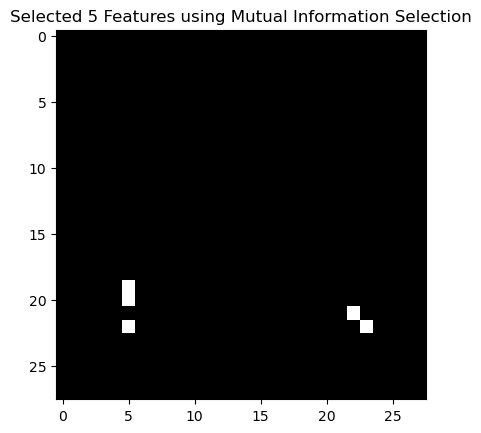

accuracy score MI selection = 0.612
Converged after 6 iterations.
accuracy score MI selection = 0.67
NMI score MI selection = 0.37392062254218783


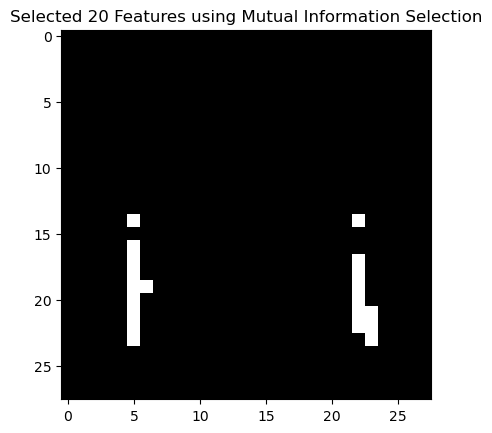

accuracy score MI selection = 0.618
Converged after 16 iterations.
accuracy score MI selection = 0.606
NMI score MI selection = 0.36503407830182033


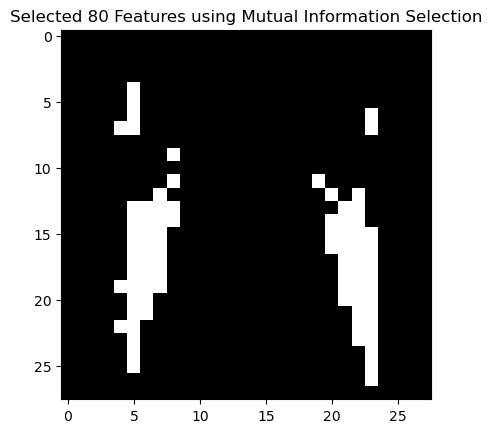

accuracy score MI selection = 0.854
Converged after 5 iterations.
accuracy score MI selection = 0.786
NMI score MI selection = 0.4684449189455999


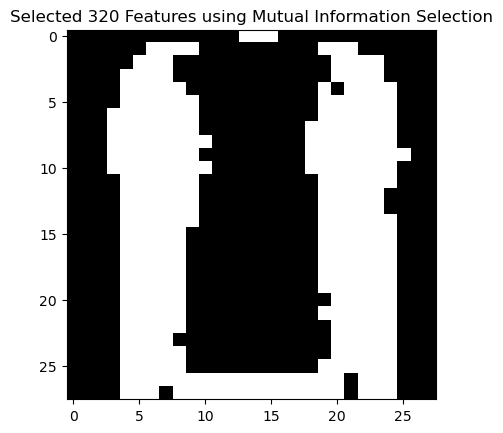

/Users/brucequ/miniforge3/envs/deeplearning2/lib/python3.8/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


accuracy score MI selection = 0.864
Converged after 3 iterations.
accuracy score MI selection = 0.812
NMI score MI selection = 0.5327367283255585


In [ ]:
#### External Reference feature selection ####
# Mutual Information based feature selection
for n_feature in n_features:
  data = prepare_mnist_data()
  mi_selector = MIFeatureSelection(num_features=n_feature)
  mi_selector.computeMI(data['trainX'], data['trainY'])
  feature_selected = mi_selector.select()
  data['trainX'] = data['trainX'][:, feature_selected]
  data['testX'] = data['testX'][:, feature_selected]

  # visualize the selected features
  visualize_features(feature_selected, "Mutual Information Selection")
  
  # Classification task
  clf_mi = MyClassifier_OvO(num_class=3)
  clf_mi.train(data['trainX'], data['trainY']) 
  pred_Y = clf_mi.predict(data['testX'])
  acc_score = accuracy_score(y_true=data['testY'], y_pred=pred_Y)
  print(f"accuracy score MI selection = {acc_score}")
  
  # Clustering task
  clu_mi = MyClustering(num_classes=10)
  clu_mi.train(data['trainX'])
  pred_labels = clu_mi.infer_cluster(data['testX'])
  acc_score_mi = clu_mi.evaluate_classification(trainY=data['trainY'].astype(int), testX=data['testX'], testY=data['testY'].astype(int))
  nmi_score_mi = clu_mi.evaluate_clustering(trainY=data['trainY'].astype(int))
  print(f"accuracy score MI selection = {acc_score_mi}")
  print(f"NMI score MI selection = {nmi_score_mi}")

In [ ]:
#### DUT feature selection ####

# Plots

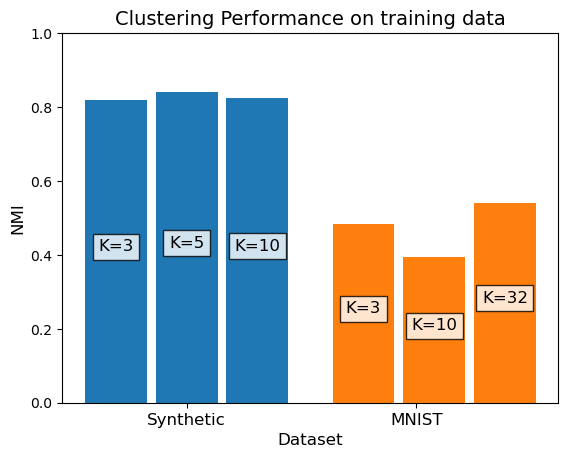

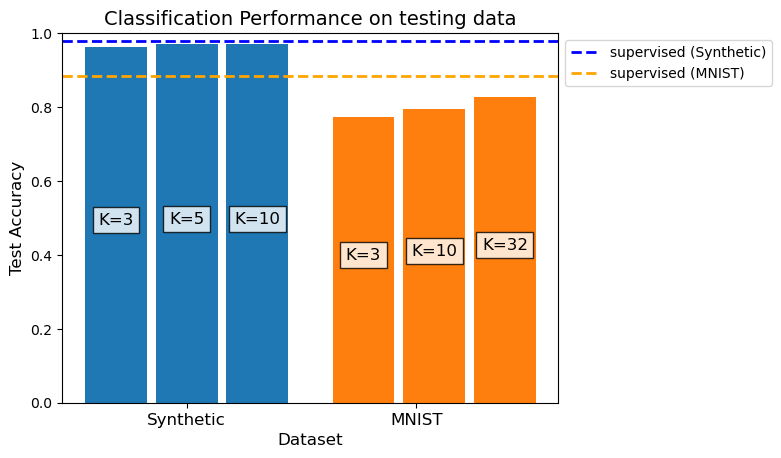

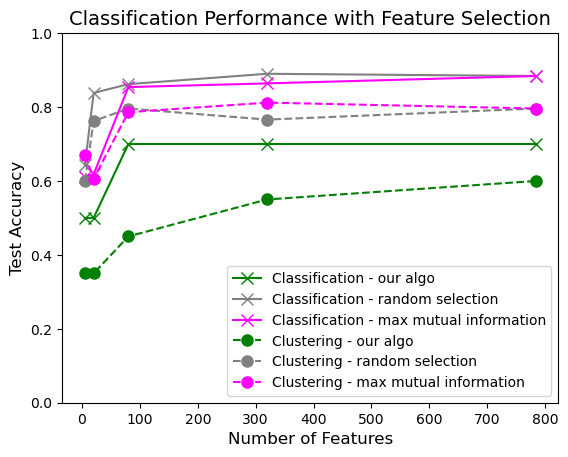

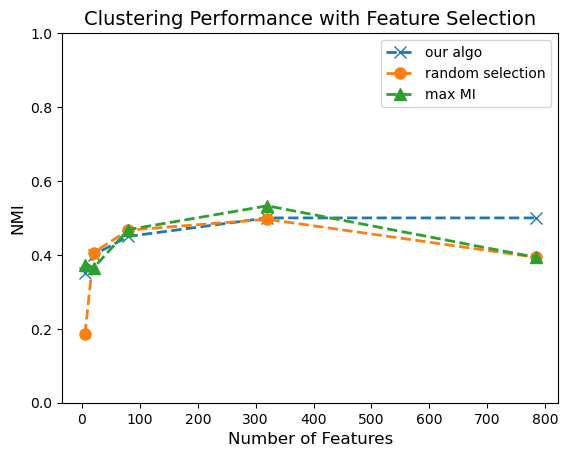

In [110]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)


# Task 1
result1 = {'synthetic_test_accuracy':0.978, 'mnist_test_accuracy':0.884}


# Task 2
result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.8200, 0.8401, 0.8235], 'classification_accuracy':[0.9620,0.9700,0.9700]},
            'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.4842, 0.3935, 0.5415], 'classification_accuracy':[0.7740,0.7960,0.8280]}}

# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

result3_2 = {'feature_number':[5, 20, 80, 320, 784], 
             'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 
             'classifier_accuracy(random)':[0.644, 0.838, 0.862, 0.890, 0.884],
             'classifier_accuracy(Max MI)':[0.612, 0.618, 0.854, 0.864, 0.884],  
             'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 
             'clustering_accuracy(random)': [0.600, 0.762, 0.796, 0.766, 0.7960],
             'clustering_accuracy(Max MI)':[0.67, 0.606, 0.786, 0.812, 0.7960],
             'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 
             'nmi(random)':[0.1855, 0.4064, 0.4670, 0.4963, 0.3935],
             'nmi(Max MI)':[0.3739, 0.3650, 0.4684, 0.5327, 0.3935]}


plot_result(result1 = result1, result2 = result2, result3_1 = None, result3_2=result3_2)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)